In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Data/DataFrameParaHacerModelos.csv")
df

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategorizada,AgeCategorizada
0,Spain,Female,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Fair,Adultos
1,France,Female,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Poor,Adultos
2,France,Female,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Good,Adultos
3,Spain,Female,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent,Adultos
4,Spain,Male,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Fair,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,France,Male,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,Very Good,Adultos
9496,France,Male,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Poor,Jovenes-Adultos
9497,France,Female,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,Good,Adultos
9498,Germany,Male,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Very Good,Adultos


# Ahora vamos a empezar a separar los datos en train y test para modelizar con los datos que tenemos 

In [3]:
variablesx = list(df.columns)
variablesx.remove("Exited")
variablesx


['Geography',
 'Gender',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned',
 'CreditScoreCategorizada',
 'AgeCategorizada']

In [4]:
x = df[variablesx]
y = df["Exited"]
y


0       0
1       1
2       0
3       0
4       1
       ..
9495    0
9496    0
9497    1
9498    1
9499    0
Name: Exited, Length: 9500, dtype: int64

# Categoricas

['Geography',
 'Gender',
 'Card Type',
 'CreditScoreCategorizada',
 'AgeCategorizada',
 'HasCrCard',
 'IsActiveMember',
 'Complain',
 'Satisfaction Score']

# Numericas

    - Balance
    - EstimatedSalary  
    - Point Earned
    - Tenure
    - NumOfProducts 

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=922)

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
columns_to_encode = ['Geography','Gender','Card Type','CreditScoreCategorizada','AgeCategorizada','HasCrCard','IsActiveMember','Complain','Satisfaction Score']
encoded_columns_train = ohe.fit_transform(x_train[columns_to_encode].values)
encoded_columns_test = ohe.transform(x_test[columns_to_encode].values)

In [32]:
import pickle 

with open ('./Transformaciones/TransformacionOHEVariableComplain.pkl',"wb") as f:
    pickle.dump(ohe,f)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_escaler = ["Balance","EstimatedSalary","Point Earned","Tenure","NumOfProducts"]
escaler_columns_train = scaler.fit_transform(x_train[columns_to_escaler].values)
escaler_columns_test = scaler.transform(x_test[columns_to_escaler].values)

In [33]:
with open("./Transformaciones/TransformacionSCALERVariableComplain.pkl","wb")as f:
    pickle.dump(scaler,f)

In [8]:
print(encoded_columns_test.shape)
encoded_columns_train.shape


(1900, 30)


(7600, 30)

In [9]:
x_train_final = np.concatenate([encoded_columns_train,escaler_columns_train],axis=1)
x_test_final = np.concatenate([encoded_columns_test,escaler_columns_test],axis=1)

In [10]:
print(x_train_final.shape)
x_test_final.shape

(7600, 35)


(1900, 35)

# Regresion Logistica

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 922, max_iter =300)
logreg.fit(x_train_final,y_train)

LogisticRegression(max_iter=300, random_state=922)

In [12]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #
from sklearn.metrics import confusion_matrix 

In [13]:
y_predict = logreg.predict(x_test_final)
logreg_accuracy = accuracy_score(y_test,y_predict)
logreg_accuracy

0.9973684210526316

In [14]:
logreg.predict_proba(x_test_final)

array([[9.98437169e-01, 1.56283069e-03],
       [4.11664283e-03, 9.95883357e-01],
       [9.97210344e-01, 2.78965589e-03],
       ...,
       [9.99599487e-01, 4.00512748e-04],
       [9.98988513e-01, 1.01148675e-03],
       [9.98505053e-01, 1.49494657e-03]])

In [15]:
logreg.predict(x_test_final)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
logreg_AUC = roc_auc_score(y_test,logreg.predict_proba(x_test_final)[:,1])
logreg_AUC

0.9982912540103221

In [17]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1495,3
Se va del Banco,2,400


In [18]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.004975124378109453

In [19]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.0020026702269692926

Lo peor en mi opinion es la tasa de falsos negativos que el modelo predice que no se va y se va

In [20]:
logreg.coef_[0]

array([-3.10781966e-01,  4.80507096e-01, -1.69576558e-01,  2.03681891e-02,
       -2.02196174e-02, -1.03768687e-01, -8.46220197e-02,  4.42449794e-03,
        1.84114781e-01,  9.60379179e-02, -1.26185507e-01, -6.41123859e-02,
       -3.90466392e-02,  1.33455186e-01, -8.33273621e-02,  9.64292585e-01,
       -1.61238878e-01, -7.75347772e-01,  5.57699994e-02, -6.37186087e-02,
        6.38671804e-02,  3.36983947e-01, -3.36835375e-01, -5.84417220e+00,
        5.84432077e+00, -7.05262972e-02,  4.47910667e-01, -2.85263933e-01,
        1.60496188e-01, -2.52468052e-01, -5.17025162e-02, -2.97169771e-02,
       -3.28936067e-01, -9.01860607e-02, -7.69447728e-02])

In [21]:
precisiones = dict()
precisiones["RegresionLogistica"]=[logreg_accuracy,logreg_AUC,tfn,tfp]

In [22]:
precisiones

{'RegresionLogistica': [0.9973684210526316,
  0.9982912540103221,
  0.004975124378109453,
  0.0020026702269692926]}

In [23]:
import pickle 
with open ("./Modelos/Mejor_RegresionLogistica.pkl","wb") as f:
    pickle.dump(logreg,f)

### Importamos el modelo

In [24]:
with open ("./Modelos/Mejor_RegresionLogistica.pkl","rb") as f:
    modeloRegrisoLogistica=pickle.load(f)

### Cargamos los datos con los que vamos a comprobar

In [155]:
dfDatos = pd.read_csv("./Data/datosParaComprobarModelo.csv")

In [156]:
dfDatos

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15765311,Zhirov,642,Spain,Male,34,8,0.00,1,1,0,72085.10,0,0,3,GOLD,323
1,15704466,Udokamma,692,France,Female,34,7,0.00,2,1,0,195074.62,0,0,1,DIAMOND,427
2,15573045,Earl,547,France,Male,62,10,127738.75,2,1,1,85153.00,0,0,4,GOLD,666
3,15596761,Hawdon,515,Germany,Male,60,9,113715.36,1,1,0,18424.24,1,1,1,GOLD,850
4,15588622,Marchesi,599,Germany,Male,25,7,108380.72,1,1,1,79005.95,0,0,1,SILVER,933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15784092,Henderson,732,France,Male,36,7,126195.81,1,1,1,133172.48,0,0,1,DIAMOND,549
496,15805112,Pokrovsky,578,France,Male,38,7,82259.29,1,1,0,8996.97,0,0,1,DIAMOND,325
497,15641366,Y?an,599,Germany,Male,61,1,124737.96,1,0,1,90389.61,1,1,3,PLATINUM,914
498,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790


In [157]:
dfFinal = dfDatos.copy()

In [158]:
bins = [300,579,669,739,799,850]
names = ["Poor","Fair","Good","Very Good","Excellent"]
dfDatos["CreditScoreCategorizada"]= pd.cut(dfDatos["CreditScore"],bins,labels=names)

In [159]:
dfDatos.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned', 'CreditScoreCategorizada'],
      dtype='object')

In [160]:
bins = [17,25,35,45,65,dfDatos["Age"].max()]
names = ["Jovenes","Jovenes-Adultos","Adultos","Adultos-Mayores","Mayores"]
dfDatos["AgeCategorizada"]= pd.cut(dfDatos["Age"],bins,labels=names)

In [161]:
dfDatos.drop(columns=["CustomerId","Surname","CreditScore","Age"], inplace=True)


In [162]:
variablesx = list(dfDatos.columns)
variablesx.remove("Exited")
variablesx


['Geography',
 'Gender',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned',
 'CreditScoreCategorizada',
 'AgeCategorizada']

In [163]:
x = dfDatos[variablesx]
y = dfDatos["Exited"]
y


0      0
1      0
2      0
3      1
4      0
      ..
495    0
496    0
497    1
498    1
499    1
Name: Exited, Length: 500, dtype: int64

In [164]:
with open ("./Transformaciones/TransformacionOHEVariableComplain.pkl","rb") as f:
    transformacionOHE=pickle.load(f)

In [165]:
with open ("./Transformaciones/TransformacionSCALERVariableComplain.pkl","rb") as f:
    transformacionScaler=pickle.load(f)

In [166]:
columns_to_encode = ['Geography','Gender','Card Type','CreditScoreCategorizada','AgeCategorizada','HasCrCard','IsActiveMember','Complain','Satisfaction Score']
x_categoricas= transformacionOHE.transform(x[columns_to_encode].values)
columns_to_escaler = ["Balance","EstimatedSalary","Point Earned","Tenure","NumOfProducts"]
x_numericas= transformacionScaler.transform(x[columns_to_escaler].values)

In [167]:
x = np.concatenate([x_categoricas,x_numericas],axis=1)
 

In [168]:
y_predict = modeloRegrisoLogistica.predict(x)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.994

In [171]:
dfFinal["Prediccion"]= logreg.predict(x)

In [172]:
dfFinal["Probabilidad de irse del banco"] = logreg.predict_proba(x)[:,1]

In [174]:
dfFinal["Prediccion Sin Numeros"]=dfFinal["Prediccion"].apply(lambda x: "Se queda del banco" if 0 else "Se va del banco")

In [178]:
dfFinal["Probabilidad de irse del banco"]= dfFinal["Probabilidad de irse del banco"].apply(lambda x: str(round((float('{:f}'.format(x))*100),3))+"%")

In [179]:
dfFinal

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Prediccion,Probabilidad de irse del banco,Prediccion Sin Numeros
0,15765311,Zhirov,642,Spain,Male,34,8,0.00,1,1,0,72085.10,0,0,3,GOLD,323,0,0.067%,Se va del banco
1,15704466,Udokamma,692,France,Female,34,7,0.00,2,1,0,195074.62,0,0,1,DIAMOND,427,0,0.057%,Se va del banco
2,15573045,Earl,547,France,Male,62,10,127738.75,2,1,1,85153.00,0,0,4,GOLD,666,0,0.127%,Se va del banco
3,15596761,Hawdon,515,Germany,Male,60,9,113715.36,1,1,0,18424.24,1,1,1,GOLD,850,1,99.797%,Se va del banco
4,15588622,Marchesi,599,Germany,Male,25,7,108380.72,1,1,1,79005.95,0,0,1,SILVER,933,0,0.075%,Se va del banco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15784092,Henderson,732,France,Male,36,7,126195.81,1,1,1,133172.48,0,0,1,DIAMOND,549,0,0.049%,Se va del banco
496,15805112,Pokrovsky,578,France,Male,38,7,82259.29,1,1,0,8996.97,0,0,1,DIAMOND,325,0,0.152%,Se va del banco
497,15641366,Y?an,599,Germany,Male,61,1,124737.96,1,0,1,90389.61,1,1,3,PLATINUM,914,1,99.499%,Se va del banco
498,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790,1,98.885%,Se va del banco


### El class_weight balanced no mejora el modelo por lo que no lo vamos a utlizar

In [39]:
precisiones

{'RegresionLogistica': [0.9973684210526316,
  0.9982846116546772,
  0.004975124378109453,
  0.0020026702269692926]}

## Arbol de decision 

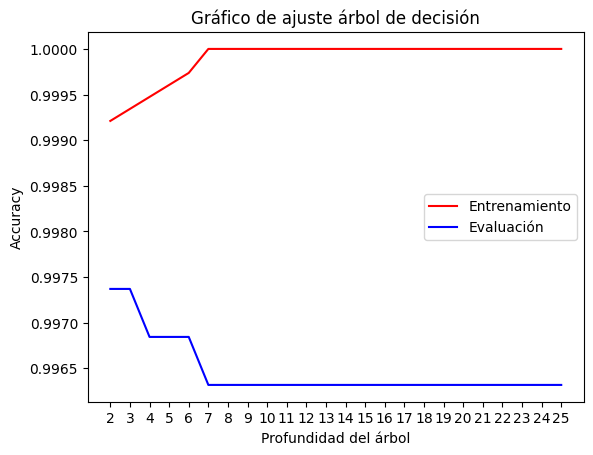

In [40]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
max_depth_list = list(range(2, 26))
for profundidad in max_depth_list:
    modelo = DecisionTreeClassifier(max_depth = profundidad, random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))
    
plt.plot(max_depth_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_depth_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad del árbol')
plt.xticks(range(2,26))
plt.show()

Nos vamos a quedar con una profundidad de 3 arboles 

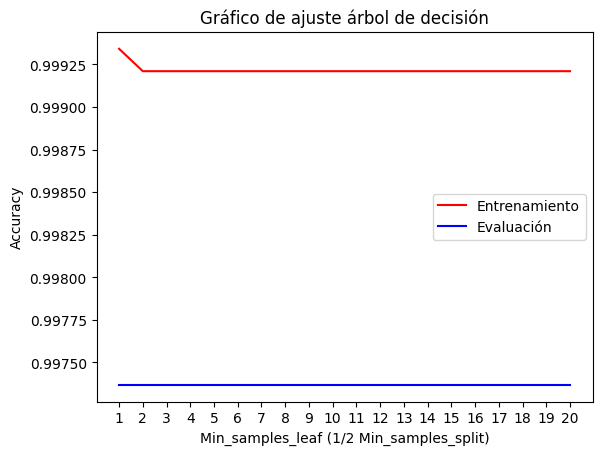

In [41]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
min_samples_list = list(range(1, 21))

for min_sample in min_samples_list:
    modelo = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = min_sample, min_samples_split = 2*min_sample, random_state = 922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(min_samples_list, train_prec, color='r', label='Entrenamiento')
plt.plot(min_samples_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Min_samples_leaf (1/2 Min_samples_split)')
plt.xticks(range(1,21))
plt.show()

Nos quedamos con 10 de min_sample_leaf

In [42]:
treeModel = DecisionTreeClassifier(max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922)
treeModel.fit(x_train_final, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                       random_state=922)

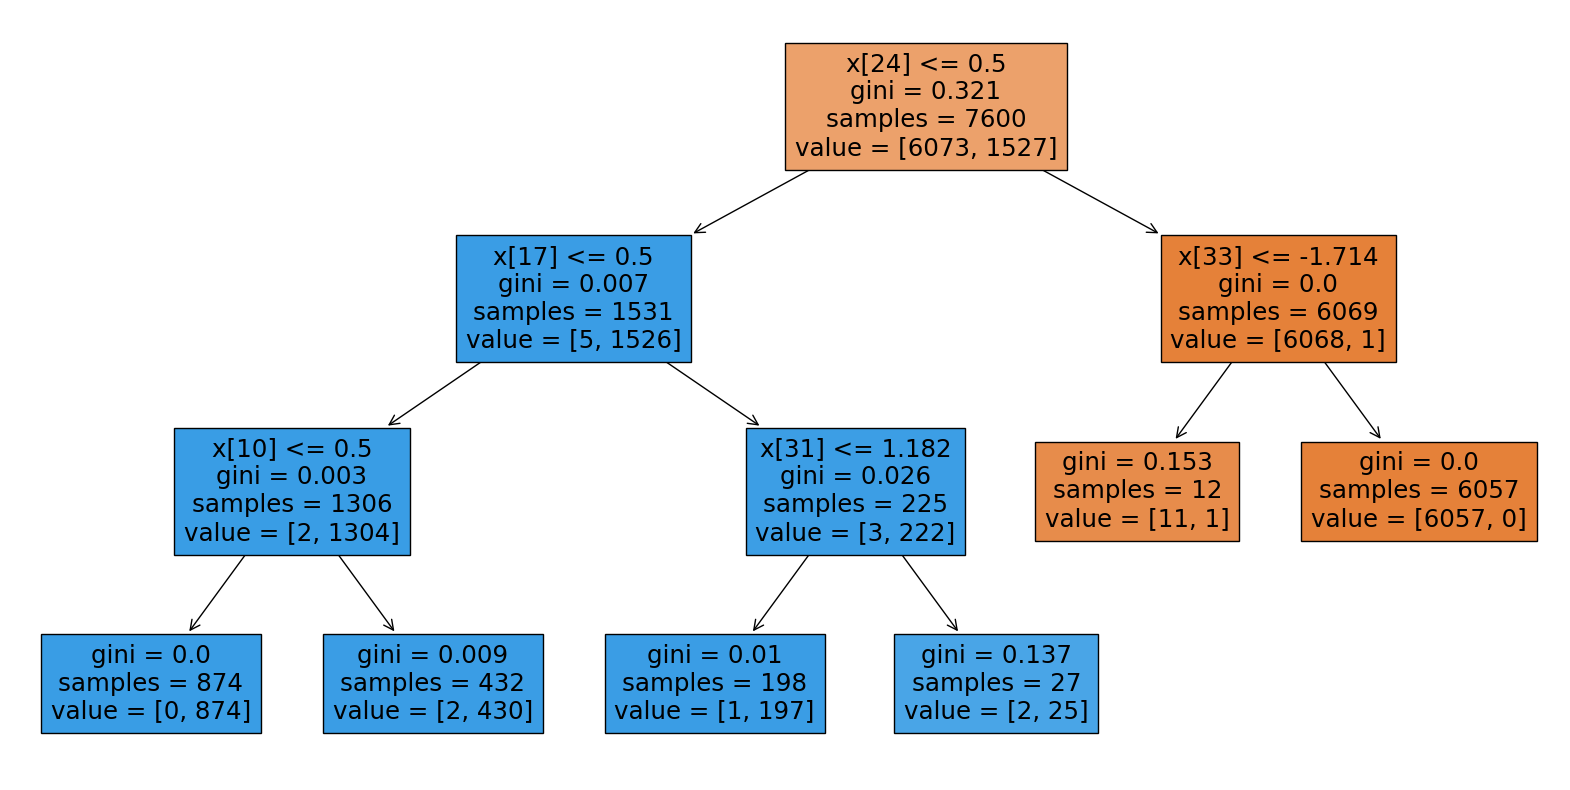

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(treeModel, filled=True)
plt.show()

In [45]:
treeModel.feature_importances_.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.102331503182058e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.2013113020081264e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9998111908358758,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.321062741365965e-05,
 0.0,
 6.848309218712978e-05,
 0.0,
 0.0]

#### Podemos ver como la variable de complain tiene mucha importancia osea en funcion de eso se pude saber a ciencia casi perfecta si se va a quedar o irse



Vamos a seguir con esa variable en el modelo pero en un futuro la podemos quitar

In [47]:
y_predict = treeModel.predict(x_test_final)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9973684210526316

In [48]:
y_predict_proba = treeModel.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.996889716969226

In [49]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1495,3
Se va del Banco,2,400


In [50]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.004975124378109453

In [51]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.0020026702269692926